In [2]:
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns

import requests
import time

## Importing Data

In [3]:
#mobile apps are tracked on AppAnnie.  Downloaded reviews from this site
ios_reviews_19 = pd.read_csv('App_Annie_Intelligence_Reviews_iOS_R.B.I. Baseball 19_2019_03_20-2019_07_17_Page_1.csv', header=14)
googplay_reviews_19 = pd.read_csv('App_Annie_Intelligence_Reviews_Google Play_R.B.I. Baseball 19_2019_03_20-2019_07_17_Page_1.csv', header=14)

In [155]:
#Make API calls to Microsoft Xbox/PC game reviews
#This function takes in the URL and creates a dataframe with details about the review and reviewer of the game
def get_reviews(url):
    skip = 0
    has_next_page = True
    reviews_df = pd.DataFrame(columns=['Platform','Market','Locale','SubmittedDateTime','ProductId','PackageVersion','UserName',
                                        'Title','Rating','ReviewId','ReviewText','HelpfulNegative','HelpfulPositive'])
    
    while has_next_page:
        response = requests.get(url,
            params = {'activetab':'pivot:reviewstab','skipItems': skip},
            headers={'ajaxevent': 'pagination','content-length': '0','spamodulename': 'reviewslist'})
        
        json_response = response.json()
        data = json_response['Data']
       
        for item in data['Items']:
            try: 
                version = item['PackageVersion']
            except:
                version = float('NaN')
            
            try:
                title = item['Title']
            except:
                title = float('NaN')
                
            
            reviews_df = reviews_df.append({'Platform': item['DeviceFamily'],
                                            'HelpfulNegative': item['HelpfulNegative'],
                                            'HelpfulPositive': item['HelpfulPositive'],
                                            'Locale': item['Locale'],
                                            'Market': item['Market'],
                                            'PackageVersion': version,
                                            'ProductId': item['ProductId'], 
                                            'Rating': item['Rating'],
                                            'ReviewId': item['ReviewId'],
                                            'ReviewText': item['ReviewText'],
                                            'SubmittedDateTime': item['SubmittedDateTime'],
                                            'Title': title,
                                            'UserName': item['UserName']}, ignore_index=True)
                            
        
        print(f'Skip Number: {skip}')
        print('Reviews Collected: ', len(data["Items"]))
        print('Total Reviews: ', data["PagingInfo"]["TotalItems"])
        
        skip += 10
        
        if data["PagingInfo"]["TotalItems"] > skip:
            has_next_page = True
        else:
            has_next_page = False
        
        time.sleep(10)
    
    return reviews_df
      

In [79]:
#calling get_reviews for the microsoft API
xbox_reviews_19 = get_reviews('https://www.microsoft.com/en-us/p/rbi-baseball-19/9plkw273z2p0')

Skip Number: 0
Reviews Collected:  10
Total Reviews:  135
Skip Number: 10
Reviews Collected:  10
Total Reviews:  135
Skip Number: 20
Reviews Collected:  10
Total Reviews:  135
Skip Number: 30
Reviews Collected:  10
Total Reviews:  135
Skip Number: 40
Reviews Collected:  10
Total Reviews:  135
Skip Number: 50
Reviews Collected:  10
Total Reviews:  135
Skip Number: 60
Reviews Collected:  10
Total Reviews:  135
Skip Number: 70
Reviews Collected:  10
Total Reviews:  135
Skip Number: 80
Reviews Collected:  10
Total Reviews:  135
Skip Number: 90
Reviews Collected:  10
Total Reviews:  135
Skip Number: 100
Reviews Collected:  10
Total Reviews:  135
Skip Number: 110
Reviews Collected:  10
Total Reviews:  135
Skip Number: 120
Reviews Collected:  10
Total Reviews:  135
Skip Number: 130
Reviews Collected:  5
Total Reviews:  135


## Exploring the Data

In [5]:
#eda function takes in a dataframe and the columns you'd like to be the same for a review to be considered a duplicate
#and prints out descriptive statistics about the df
def eda(df, dup_columns):
    print(df.info())
    print('--------------------------------')
    print(df.describe())
    print('--------------------------------')
    for column in list(df.columns):
        print(df[column].value_counts())
        print('--------------------------------')
    print(df[df.duplicated(dup_columns)])
    

### iOS DF

In [6]:
from textblob import TextBlob

In [7]:
#Adding Language to iOS reviews with Textblob
ios_reviews_19['Language'] = [TextBlob(row).detect_language() for row in ios_reviews_19['Review']]

lang_dict = {'en': 'English', 'es': 'Spanish', 'zh-CN':'Chinese', 'ja':'Japanese', 'fr':'French', 'zh-TW':'Chinese',
             'de':'German','ko':'Korean', 'ar':'Arabic'}

ios_reviews_19['Language'] = [lang_dict[code] for code in ios_reviews_19['Language']]

In [ ]:
eda(ios_reviews_19,['Version', 'Rating', 'Review (Translated)'])

In [9]:
#This title was too long to have appeard twice
ios_reviews_19[ios_reviews_19['Title (Translated)'] == 'This needs a dereck jeter like mode because he is my favorite player']

,Platform,Country,Date,App ID,App Name,Publisher ID,Publisher Name,User,Version,Rating,Title,Review,Title (Translated),Review (Translated),Language
122,iOS,United States,2019-05-10,1437270942,R.B.I. Baseball 19,281969992,MLB,NaN,1.0.3,5,This needs a dereck jeter like mode because he...,You need to put in like a 2002 mode so I can p...,This needs a dereck jeter like mode because he...,You need to put in like a 2002 mode so I can p...,English
126,iOS,United States,2019-05-05,1437270942,R.B.I. Baseball 19,281969992,MLB,NaN,1.0.3,5,This needs a dereck jeter like mode because he...,You need to put in like a 2002 mode so I can p...,This needs a dereck jeter like mode because he...,You need to put in like a 2002 mode so I can p...,English


In [12]:
ios_reviews_19.drop(126, inplace=True)

In [15]:
#Dropping Duplicates
print(len(ios_reviews_19))
ios_reviews_19.drop_duplicates(['Version', 'Rating', 'Review (Translated)'],inplace=True)
print(len(ios_reviews_19))

354
353


In [16]:
#Checking date range makes sense
set(ios_reviews_19['Date'])

{'2019-03-20',
 '2019-03-21',
 '2019-03-22',
 '2019-03-23',
 '2019-03-24',
 '2019-03-25',
 '2019-03-26',
 '2019-03-27',
 '2019-03-28',
 '2019-03-29',
 '2019-03-30',
 '2019-03-31',
 '2019-04-01',
 '2019-04-02',
 '2019-04-03',
 '2019-04-04',
 '2019-04-05',
 '2019-04-06',
 '2019-04-07',
 '2019-04-08',
 '2019-04-09',
 '2019-04-10',
 '2019-04-11',
 '2019-04-12',
 '2019-04-13',
 '2019-04-14',
 '2019-04-15',
 '2019-04-16',
 '2019-04-17',
 '2019-04-18',
 '2019-04-19',
 '2019-04-20',
 '2019-04-21',
 '2019-04-22',
 '2019-04-23',
 '2019-04-24',
 '2019-04-25',
 '2019-04-26',
 '2019-04-27',
 '2019-04-28',
 '2019-04-30',
 '2019-05-01',
 '2019-05-02',
 '2019-05-03',
 '2019-05-04',
 '2019-05-06',
 '2019-05-09',
 '2019-05-10',
 '2019-05-11',
 '2019-05-12',
 '2019-05-13',
 '2019-05-14',
 '2019-05-15',
 '2019-05-16',
 '2019-05-17',
 '2019-05-18',
 '2019-05-19',
 '2019-05-20',
 '2019-05-22',
 '2019-05-23',
 '2019-05-24',
 '2019-05-25',
 '2019-05-26',
 '2019-05-27',
 '2019-05-29',
 '2019-05-30',
 '2019-06-

### Google Play DF

In [217]:
googplay_reviews_19['Country'] = "United States"

In [ ]:
#EDA for Google Play Reviews
eda(googplay_reviews_19, ['Version', 'Rating', 'Review (Translated)'])

In [19]:
print(len(googplay_reviews_19))
googplay_reviews_19.drop_duplicates(['Version', 'Rating', 'Review (Translated)'],inplace=True)
print(len(googplay_reviews_19))

184
181


### Xbox DF

In [ ]:
#EDA for XBox DF
eda(xbox_reviews_19, ['PackageVersion', 'Rating', 'ReviewText'])

In [24]:
xbox_reviews_19['Language'] = [lang_dict[row[:2].lower()] for row in xbox_reviews_19['Locale']]

In [26]:
xbox_reviews_19['Date'] = [dtstring[:10] for dtstring in xbox_reviews_19['SubmittedDateTime']]
set(xbox_reviews_19['Date'])

## Combining Dataframes

In [218]:
ios_19 = ios_reviews_19[['Platform','Country','Language','Date','Version','Rating','Title (Translated)','Review (Translated)']].copy()
ios_19.columns=['Platform', 'Country', 'Language', 'Date', 'Version', 'Rating','Title', 'Review']


In [219]:
gp_19 = googplay_reviews_19[['Platform', 'Country', 'Language', 'Date', 'Version', 'Rating', 'Title (Translated)', 'Review (Translated)']].copy()
gp_19.columns = ['Platform', 'Country', 'Language', 'Date', 'Version', 'Rating', 'Title', 'Review']


In [221]:
xbox_19 = xbox_reviews_19[['Platform', 'Market', 'Language', 'Date', 'PackageVersion', 'Rating', 'Title','ReviewText']].copy()
xbox_19.columns = ['Platform', 'Country', 'Language', 'Date', 'Version', 'Rating', 'Title', 'Review']
xbox_19['Country'] = ['United States' for x in xbox_19['Country']]

In [32]:
reviews_19 = pd.concat([ios_19,gp_19,xbox_19], ignore_index=True)

In [153]:
eda(reviews_19, ['Version', 'Rating', 'Review'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 669 entries, 0 to 668
Data columns (total 9 columns):
Platform    669 non-null object
Country     488 non-null object
Language    669 non-null object
Date        669 non-null object
Version     606 non-null object
Rating      669 non-null int64
Title       486 non-null object
Review      669 non-null object
text        669 non-null object
dtypes: int64(1), object(8)
memory usage: 47.1+ KB
None
--------------------------------
           Rating
count  669.000000
mean     2.518685
std      1.578778
min      1.000000
25%      1.000000
50%      2.000000
75%      4.000000
max      5.000000
--------------------------------
iOS                353
Google Play        181
Windows.Xbox       129
Windows.Desktop      6
Name: Platform, dtype: int64
--------------------------------
United States         422
Canada                 18
United Kingdom          8
Mexico                  8
China                   6
Japan                   5
Dominican Repub

## Visualizations

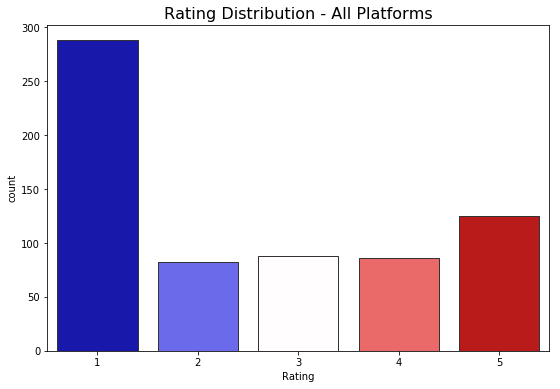

In [126]:
plt.figure(figsize=(9,6))
sns.countplot(x='Rating', data=reviews_19, palette = 'seismic', edgecolor='.2')
plt.title('Rating Distribution - All Platforms', fontsize=16);

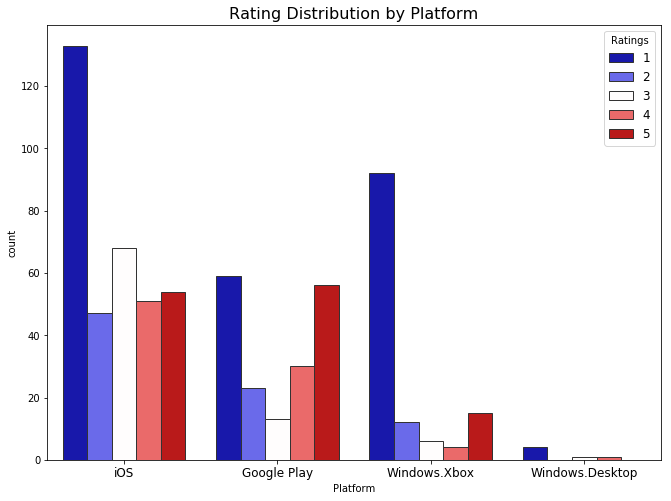

In [131]:
plt.figure(figsize=(11,8))
sns.countplot(x='Platform', hue='Rating', data=reviews_19, palette = 'seismic', edgecolor='.2')
plt.xticks(fontsize=12)
plt.title('Rating Distribution by Platform', fontsize=16)
plt.legend(title="Ratings", loc='upper right', fontsize='large');

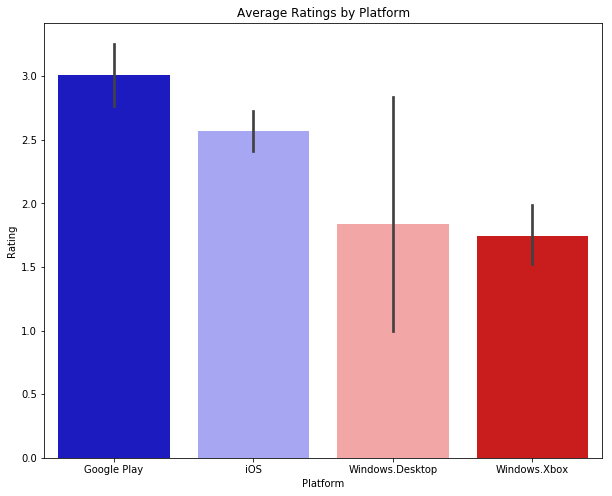

In [118]:
plt.figure(figsize=(10,8))
sns.barplot(x=reviews_19['Platform'], y=reviews_19['Rating'], palette = 'seismic',order=['Google Play', 'iOS', 'Windows.Desktop', 'Windows.Xbox'] )
plt.title('Average Ratings by Platform');

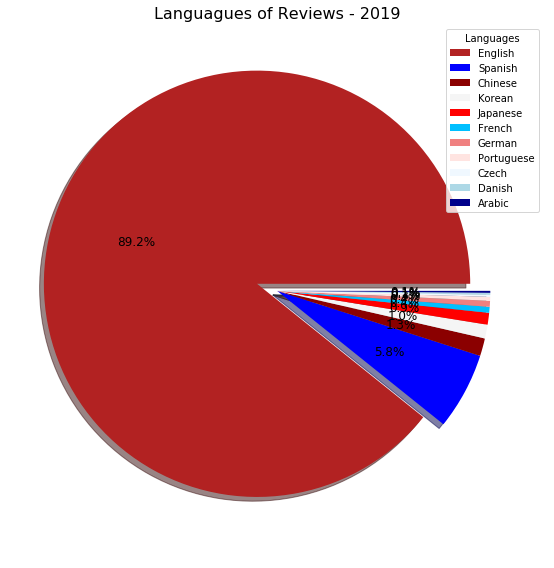

In [135]:
plt.figure(figsize=(10,8))
plt.pie(reviews_19['Language'].value_counts(), 
        autopct='%1.1f%%',
        textprops={'fontsize': 12},
        explode=(.1, 0,0,0,0,0,0,0,0,0,0), 
        shadow=True,
        colors=['firebrick','blue','darkred','whitesmoke','red','deepskyblue','lightcoral','mistyrose','aliceblue','lightblue','darkblue'])
plt.legend(labels=reviews_19['Language'].value_counts().index, title='Languages',loc="best")
plt.title('Languagues of Reviews - 2019', fontsize=16)
plt.tight_layout()
plt.show()

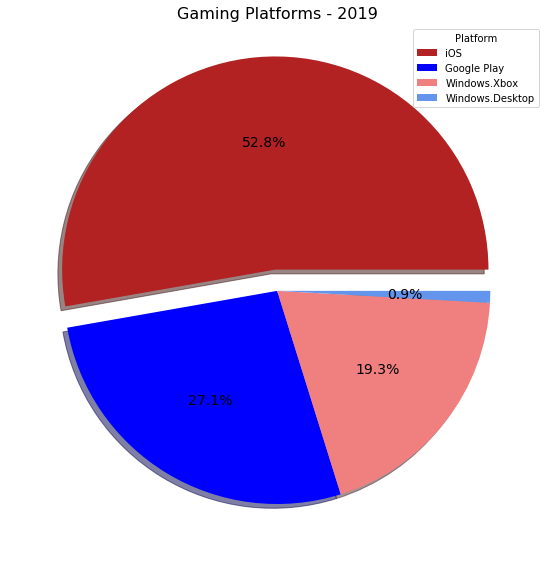

In [139]:
plt.figure(figsize=(10,8))
plt.pie(reviews_19['Platform'].value_counts(), 
        autopct='%1.1f%%', 
        textprops={'fontsize': 14},
        explode=(.1, 0,0,0), 
        shadow=True,
        colors=['firebrick','blue','lightcoral','cornflowerblue'])
plt.legend(labels=reviews_19['Platform'].value_counts().index, title='Platform',loc="best", fontsize='medium')
plt.title('Gaming Platforms - 2019', fontsize=16)
plt.tight_layout()
plt.show()

In [119]:
reviews_19['Rating'].mean()

2.5186846038863977

## NLP

In [39]:
from gensim.summarization import summarize, keywords

In [40]:
import string
from nltk.corpus import stopwords
from nltk import word_tokenize, sent_tokenize
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import LancasterStemmer, SnowballStemmer, RegexpStemmer, WordNetLemmatizer 

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer

### Preprocessing

In [42]:
stoplist = stopwords.words('english')+['baseball','every','ball','hit']

In [43]:
lemmer = WordNetLemmatizer()

def lower(review):
    lowercase_review = review.lower()
    return lowercase_review

def remove_punc(lowercase_review):
    stripped_review = lowercase_review.translate(str.maketrans('', '', string.punctuation))
    stripped_review.replace('\n',' ')
    return stripped_review

def lem_reviews(stripped_review, lemmer):
    lems = lemmer.lemmatize(stripped_review)
    return lems

def normalize(review, lemmer):
    lower_rev = lower(review)
    no_punc = remove_punc(lower_rev)
    lems = lem_reviews(no_punc, lemmer)
    return lems

In [44]:
#Creating a new column that is preprocessed text versions of the reviews
reviews_19['text'] = reviews_19['Review'].apply(lambda x: normalize(x, lemmer))

### TF-IDF and Most Important Words

In [73]:
#creating instance of TF-IDF Vectorizor, transforming the text, and finding features
vec = TfidfVectorizer(stop_words=stoplist, ngram_range=(1,3))
total_transform = vec.fit_transform(reviews_19['text'])
features = vec.get_feature_names()

In [116]:
# This block of code was borrowed and adapted for my purposes from https://buhrmann.github.io/tfidf-analysis.html

def top_tfidf_feats(row, features, top_n=25):
    ''' Get top n tfidf values in row and return them with their corresponding feature names.'''
    topn_ids = np.argsort(row)[::-1][:top_n]
    top_feats = [(features[i], row[i]) for i in topn_ids]
    df = pd.DataFrame(top_feats)
    df.columns = ['feature', 'tfidf']
    return df

def top_feats_in_doc(Xtr, features, row_id, top_n=25):
    ''' Top tfidf features in specific document (matrix row) '''
    row = np.squeeze(Xtr[row_id].toarray())
    return top_tfidf_feats(row, features, top_n)

def top_mean_feats(Xtr, features, grp_ids=None, min_tfidf=0.1, top_n=25):
    ''' Return the top n features that on average are most important amongst documents in rows
        indentified by indices in grp_ids. '''
    if grp_ids:
        D = Xtr[grp_ids].toarray()
    else:
        D = Xtr.toarray()

    D[D < min_tfidf] = 0
    tfidf_means = np.mean(D, axis=0)
    return top_tfidf_feats(tfidf_means, features, top_n)

def top_feats_by_class(Xtr, y, features, min_tfidf=0.1, top_n=25):
    ''' Return a list of dfs, where each df holds top_n features and their mean tfidf value
        calculated across documents with the same class label. '''
    dfs = []
    labels = np.unique(y)
    for label in labels:
        ids = np.where(y==label)
        feats_df = top_mean_feats(Xtr, features, ids, min_tfidf=min_tfidf, top_n=top_n)
        feats_df.label = label
        dfs.append(feats_df)
    return dfs

def plot_tfidf_classfeats_h(dfs):
    ''' Plot the data frames returned by the function plot_tfidf_classfeats(). '''
    fig = plt.figure(figsize=(14, 9), facecolor="w")
    x = np.arange(len(dfs[0]))
    for i, df in enumerate(dfs):
        ax = fig.add_subplot(1, len(dfs), i+1)
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.set_frame_on(False)
        ax.get_xaxis().tick_bottom()
        ax.get_yaxis().tick_left()
        ax.set_title(str(df.label), fontsize=16)
        ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
        ax.barh(x, df.tfidf, align='center', color='#3F5D7D')
        ax.set_yticks(x)
        ax.set_ylim([-1, x[-1]+1])
        yticks = ax.set_yticklabels(df.feature)
        plt.subplots_adjust(bottom=0.09, right=0.97, left=0.15, top=0.95, wspace=0.52)
    fig.text(0.5, 0.04,"Word Importance (Mean TF-IDF Score)", ha='center',fontsize=12)
    plt.show()

In [151]:
top_mean_feats(total_transform,features)

,feature,tfidf
0,game,0.013950
1,good,0.010830
2,trash,0.009083
3,love,0.008751
4,great,0.006953
5,refund,0.005757
6,buy,0.005644
7,play,0.005308
8,money,0.005247
9,bad,0.005062


In [202]:
dfs = top_feats_by_class(total_transform, reviews_19[reviews_19['Platform'] != 'Windows.Desktop']['Platform'],features)

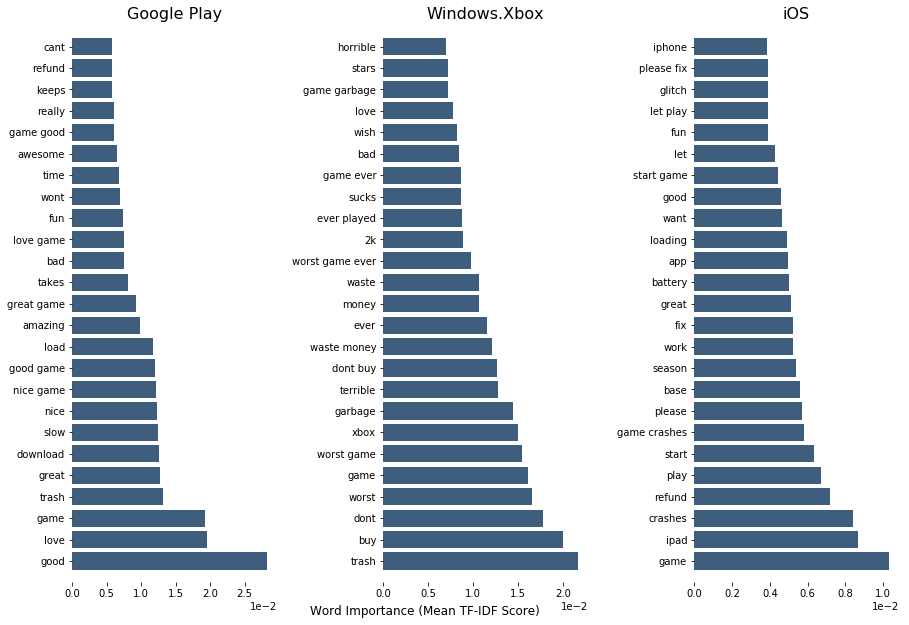

In [203]:
plot_tfidf_classfeats_h(dfs)

In [112]:
dfs_by_rating = top_feats_by_class(total_transform, reviews_19['Rating'],features)

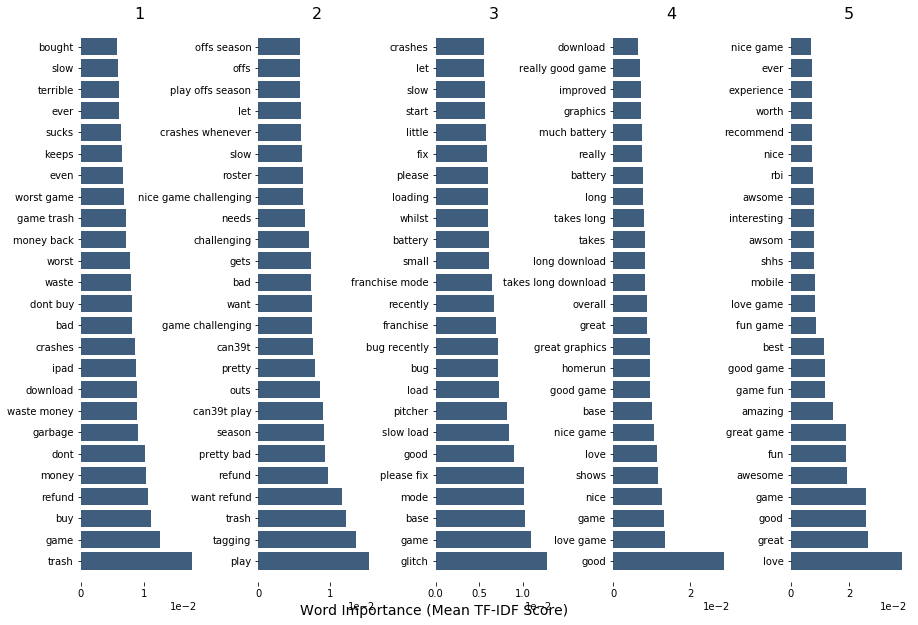

In [113]:
plot_tfidf_classfeats_h(dfs_by_rating)

### Sentiment Analysis and Most Polar Words

In [52]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [76]:
#Creating another TFIDF instance with n-gram range (1,1)
sent_vec = TfidfVectorizer(stop_words=stoplist)

#Fit & Transform reviews with TF-IDF vectorizer
sent_transform = sent_vec.fit_transform(reviews_19['text'])

#Get Features from TF-IDF vectorizer
sent_feats = sent_vec.get_feature_names()

In [77]:
#Using VADER to analyze sentiment of each feature
sia = SentimentIntensityAnalyzer()
feat_polarity = [(word, sia.polarity_scores(word)['compound']) for word in sent_feats]

In [55]:
def polar_words(sentiments):
    polar_words = [(word,score) for word,score in sentiments if score != 0]
    return polar_words
    

def most_polar_words(sentiments, neg_bound=-.5, pos_bound=.5):
    most_polar_words = [(word,score) for word,score in polar_words(sentiments) if score < neg_bound or score > pos_bound]
    return most_polar_words


In [78]:
#Creating most polar DF
most_polar = most_polar_words(feat_polarity,-.55,.55)
most_polar=pd.DataFrame(most_polar, columns=['word','polarity'])

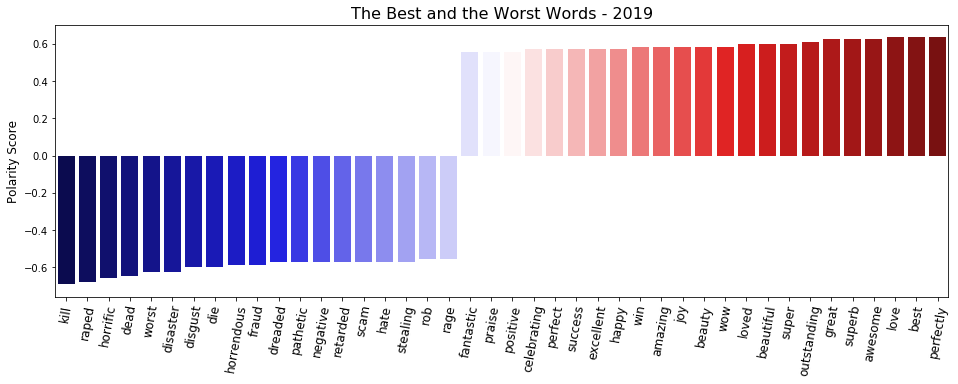

In [125]:
#Plotting Most polar words
fig, ax = plt.subplots(1, 1, figsize = (16, 5))
sns.barplot(x=most_polar.sort_values(['polarity'])['word'], y=most_polar.sort_values(['polarity'])['polarity'], palette="seismic")

ax.set_ylabel('Polarity Score', fontsize=12)    
ax.set_xlabel('')

plt.title('The Best and the Worst Words - 2019', fontsize=16)
plt.xticks(rotation=80, fontsize=12);


## Competitors

### Super Mega Baseball 2

In [156]:
xbox_supermegabaseball = get_reviews('https://www.microsoft.com/en-us/p/super-mega-baseball-2/c3pxrmhmw3zf')

Skip Number: 0
Reviews Collected:  10
Total Reviews:  138
Skip Number: 10
Reviews Collected:  10
Total Reviews:  138
Skip Number: 20
Reviews Collected:  10
Total Reviews:  138
Skip Number: 30
Reviews Collected:  10
Total Reviews:  138
Skip Number: 40
Reviews Collected:  10
Total Reviews:  138
Skip Number: 50
Reviews Collected:  10
Total Reviews:  138
Skip Number: 60
Reviews Collected:  10
Total Reviews:  138
Skip Number: 70
Reviews Collected:  10
Total Reviews:  138
Skip Number: 80
Reviews Collected:  10
Total Reviews:  138
Skip Number: 90
Reviews Collected:  10
Total Reviews:  138
Skip Number: 100
Reviews Collected:  10
Total Reviews:  138
Skip Number: 110
Reviews Collected:  10
Total Reviews:  138
Skip Number: 120
Reviews Collected:  10
Total Reviews:  138
Skip Number: 130
Reviews Collected:  8
Total Reviews:  138


In [ ]:
eda(xbox_supermegabaseball, ['PackageVersion','Rating','ReviewText'])

In [159]:
xbox_supermegabaseball['Rating'].mean()

3.1666666666666665

In [160]:
xbox_19['Rating'].mean()

1.7481481481481482

In [211]:
#Summary of review article on Super Mega Baseball 2
soup4= cook_soup('https://www.gameinformer.com/games/super_mega_baseball_2/b/xboxone/archive/2018/05/04/a-rock-solid-single.aspx')
get_summary(soup4.find('div',{'class':'clearfix text-formatted field field--name-body field--type-text-with-summary field--label-hidden field__item'}).findAll('p'))

['',
 'The bats they wield are also slimmed down from the wide size often used by toddlers to smack wiffleballs.The improved player models showcase nice animation touches like waggles in the batter’s box and stretching to catch a ball for a bang-bang play at first.',
 'After selecting a desired pitch location, you must quickly move a reticle onto that spot before the ball leaves the pitcher’s hand.\nIf you want to put a little extra mustard on the pitch, the execution window is even shorter, meaning you may catch too much of the plate, but if you are successful, it’s harder to hit.Batting also incorporates a risk/reward timing-based skill that pushes you to charge a swing and fill a meter as much as possible at the point of contact.\nEven with the computer handling the basic flyballs and grounders, the user must initiate throws and jump or dive for balls.',
 'Both modes deliver plenty of thrills that bring out the best of the sport.Super Mega Baseball 2 may not have the MLB or MLBPA li

### MLB The Show 19

In [209]:
#Summary of review article on MLB The Show 19
soup3 = cook_soup('https://www.gameinformer.com/review/mlb-the-show-19/in-the-hunt-again')
get_summary(soup3.find('div',{'class':'clearfix text-formatted field field--name-body field--type-text-with-summary field--label-hidden field__item'}).findAll('p'))

['If a big-market team like the New York Yankees underperforms and misses the playoffs, coaches’ heads roll and the roster is replenished with high-priced free agents and top prospects.',
 'Through an awesome new mode called Moments, we’re invited to play through the storylines that defined the careers of Babe Ruth, Willie Mays, and the Chicago Cubs’ epic run from losers in 2003 to champs in 2016.',
 'Sony tries to make these moments era-specific, presenting the older games in black and white complete with throwback jerseys.',
 '',
 'In this mode, you don’t have to fuss with rosters or budgets, and never once play a full nine innings with a team.',
 'Franchise is the least changed offering in the game, delivering tweaks to contracts and being able to extend player contracts, but not much outside of this.',
 'Although I saw fewer awkward bobbles, fielders can still transition weight in the blink of an eye, and no matter what position a player is in, they can still zip the ball over to f

## Pro Reviews

In [173]:
from bs4 import BeautifulSoup

In [174]:
#pull HTML from webpage and create BeautifulSoup object
def cook_soup(url): 
    webpage = requests.get(url)
    soup = BeautifulSoup(webpage.content, 'html.parser')
    return soup

In [200]:
#Summarize review article text
def get_summary(soup_path):
    summary = []
    for p in soup_path:
        try:
            summary.append(summarize(p.get_text()))
        except:
            continue
    return summary

In [193]:
#Summary for gameinformer article on RBI19
soup = cook_soup('https://www.gameinformer.com/review/rbi-baseball-19/strike-six')
get_summary(soup.find('div',{'class':'clearfix text-formatted field field--name-body field--type-text-with-summary field--label-hidden field__item'}).findAll('p'))

['In a situation with runners on first and second, I threw a slider that resulted in a weakly hit grounder to short, but the game gave me control of the third baseman for whatever reason, and the ball ended up rolling into the outfield untouched.\nMajor League Baseball also didn’t create fielding outcomes for some situations, like a shortstop inducing a double-play by stepping on second and then tossing the ball to first.',
 'Over 350 player likenesses and animations have been added to this year’s game, and they aren’t trivial little additions.\nI also liked just how deep MLB went with the legends in this game, bringing back over 165 players of yesteryear, which you can add to your franchise team’s roster.',
 '']